In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C60_cr_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n103        36.4177 (33.5553, 42.9638) (33.4700, 41.7301)  8.2601 (Jnode 202)\n',
 't_n104        27.3475 (22.0941, 34.0209) (21.7449, 33.5033) 11.7584 (Jnode 201)\n',
 't_n105        26.4412 (21.3580, 32.9248) (21.0380, 32.4238) 11.3858 (Jnode 200)\n',
 't_n106        23.5940 (19.0509, 29.4827) (18.6503, 28.9004) 10.2502 (Jnode 199)\n',
 't_n107        22.9144 (18.4974, 28.6705) (18.1957, 28.1689)  9.9732 (Jnode 198)\n',
 't_n108        21.6357 (17.4706, 27.1372) (17.1608, 26.6523)  9.4915 (Jnode 197)\n',
 't_n109        10.6631 ( 8.4005, 14.7719) ( 8.0954, 14.0861)  5.9907 (Jnode 196)\n',
 't_n110        10.5734 ( 8.3317, 14.6568) ( 8.0508, 13.9877)  5.9369 (Jnode 195)\n',
 't_n111        10.2840 ( 8.1065, 14.2659) ( 7.8038, 13.5894)  5.7856 (Jnode 194)\n',
 't_n112         9.9299 ( 7.8269, 13.7825) ( 7.5452, 13.1515)  5.6064 (Jnode 193)\n',
 't_n113         9.4584 ( 7.4596, 13.1516) ( 7.1732, 12.5099)  5.3366 (Jnode 192)\n',
 't_n114         6.2227 ( 4.9980,  8.7158) ( 4.8018,  

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175',
 't_n176',
 't_n177',
 't_n178',
 't_n179',
 't_n180',
 't_n181',
 't_n182',
 't_n183',
 't_n184',
 't_n185',
 't_n186',
 't_n187',
 't_n188',
 't_n189',
 't_n190',
 't_n191',
 't_n192',
 't_n193',

In [6]:
posterior_mean_iqtree

[36.4177,
 27.3475,
 26.4412,
 23.594,
 22.9144,
 21.6357,
 10.6631,
 10.5734,
 10.284,
 9.9299,
 9.4584,
 6.2227,
 3.552,
 2.4534,
 1.6674,
 7.1744,
 6.1686,
 9.8562,
 6.4878,
 9.4626,
 7.5986,
 6.1958,
 5.152,
 9.1735,
 8.6601,
 2.3595,
 10.1711,
 9.2418,
 7.1825,
 5.7723,
 6.5816,
 6.0152,
 5.0674,
 4.6765,
 20.2011,
 16.0104,
 21.8384,
 19.9231,
 18.5155,
 15.1896,
 8.0081,
 14.5802,
 12.7748,
 11.3501,
 9.6835,
 18.0353,
 16.577,
 4.029,
 1.7878,
 24.8036,
 23.3172,
 21.0289,
 20.2974,
 21.831,
 14.3134,
 17.8278,
 14.0432,
 26.5091,
 24.8249,
 22.4688,
 21.2012,
 17.9067,
 11.8212,
 15.8321,
 22.1664,
 7.1964,
 22.3374,
 17.3155,
 16.8032,
 16.4129,
 15.5388,
 14.2671,
 13.6141,
 13.1236,
 12.5381,
 11.1438,
 9.6321,
 8.0146,
 11.3319,
 10.6737,
 8.4562,
 9.6225,
 12.3277,
 11.4114,
 10.6006,
 9.1899,
 6.634,
 11.6432,
 10.4691,
 9.2624,
 13.5727,
 12.8852,
 12.2245,
 10.8202,
 7.9378,
 12.1313,
 7.5761,
 6.1738,
 2.3874,
 16.7406,
 14.3204]

In [7]:
lower_ci_iqtree

[]

In [8]:
upper_ci_iqtree

[]

In [9]:
file_LG = open("LG_cr_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [11]:
posterior_mean_baseml

[36.329,
 27.7719,
 26.2012,
 23.2887,
 22.3207,
 20.241,
 10.3183,
 10.1715,
 9.6378,
 9.087,
 8.5257,
 5.7117,
 3.6218,
 2.4573,
 1.6742,
 6.5097,
 5.3415,
 9.0915,
 5.9765,
 8.5959,
 6.7885,
 5.4082,
 4.9909,
 8.4516,
 7.8004,
 2.6017,
 9.5659,
 8.4624,
 6.5361,
 5.1805,
 6.0053,
 5.2953,
 4.2987,
 4.7891,
 18.5836,
 15.1447,
 20.8837,
 18.7051,
 16.8622,
 13.6905,
 7.6129,
 13.5015,
 11.3896,
 9.7896,
 8.0414,
 16.9113,
 15.2471,
 4.867,
 2.2776,
 23.4882,
 21.3273,
 18.4467,
 18.0771,
 20.1717,
 13.4328,
 16.4767,
 12.4899,
 26.7118,
 24.7,
 21.9206,
 20.0892,
 17.0024,
 11.9823,
 14.5881,
 21.4213,
 8.1786,
 21.7654,
 19.2077,
 18.0516,
 17.0523,
 15.8511,
 14.274,
 13.3917,
 12.6204,
 11.662,
 10.0599,
 8.4579,
 6.9717,
 10.3059,
 9.5089,
 7.4406,
 8.117,
 11.6323,
 10.4622,
 9.3704,
 7.9553,
 5.6629,
 10.5703,
 9.3467,
 7.9988,
 13.1188,
 12.0475,
 10.9466,
 9.3583,
 6.5461,
 11.3123,
 8.1163,
 6.2941,
 2.578,
 18.3922,
 15.5434]

In [12]:
posterior_mean_iqtree

[36.4177,
 27.3475,
 26.4412,
 23.594,
 22.9144,
 21.6357,
 10.6631,
 10.5734,
 10.284,
 9.9299,
 9.4584,
 6.2227,
 3.552,
 2.4534,
 1.6674,
 7.1744,
 6.1686,
 9.8562,
 6.4878,
 9.4626,
 7.5986,
 6.1958,
 5.152,
 9.1735,
 8.6601,
 2.3595,
 10.1711,
 9.2418,
 7.1825,
 5.7723,
 6.5816,
 6.0152,
 5.0674,
 4.6765,
 20.2011,
 16.0104,
 21.8384,
 19.9231,
 18.5155,
 15.1896,
 8.0081,
 14.5802,
 12.7748,
 11.3501,
 9.6835,
 18.0353,
 16.577,
 4.029,
 1.7878,
 24.8036,
 23.3172,
 21.0289,
 20.2974,
 21.831,
 14.3134,
 17.8278,
 14.0432,
 26.5091,
 24.8249,
 22.4688,
 21.2012,
 17.9067,
 11.8212,
 15.8321,
 22.1664,
 7.1964,
 22.3374,
 17.3155,
 16.8032,
 16.4129,
 15.5388,
 14.2671,
 13.6141,
 13.1236,
 12.5381,
 11.1438,
 9.6321,
 8.0146,
 11.3319,
 10.6737,
 8.4562,
 9.6225,
 12.3277,
 11.4114,
 10.6006,
 9.1899,
 6.634,
 11.6432,
 10.4691,
 9.2624,
 13.5727,
 12.8852,
 12.2245,
 10.8202,
 7.9378,
 12.1313,
 7.5761,
 6.1738,
 2.3874,
 16.7406,
 14.3204]

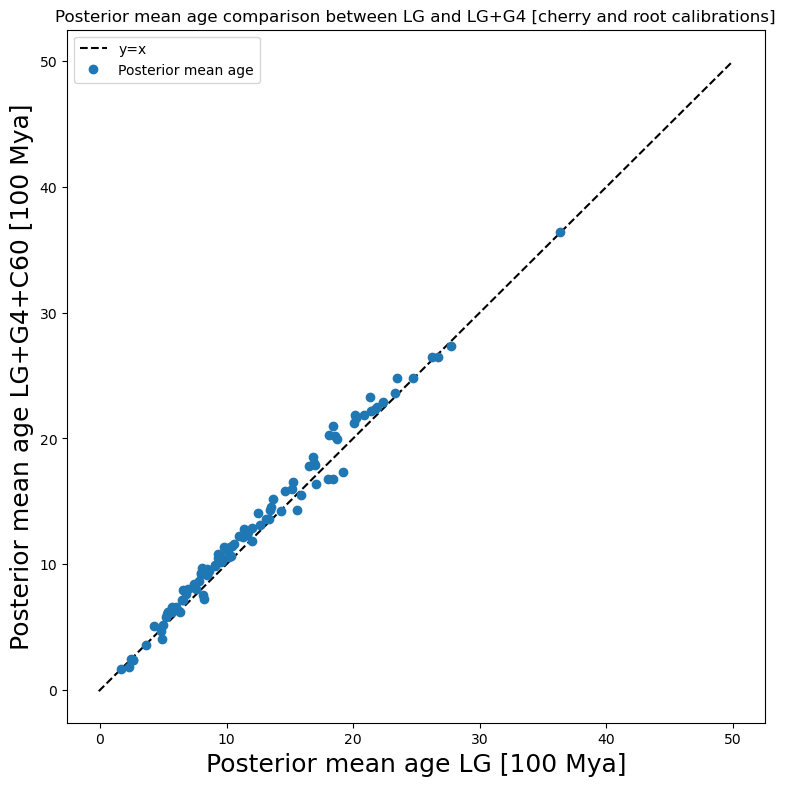

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4+C60 [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4 [cherry and root calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_C60_cr_scatter.png')

In [14]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')